In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("diminos_data.csv")

print(df.head())
print(df.info())
print(df.describe())

   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB
None
           order_id
count  1.500000e+04
mean   1.530610e+06
std    4.330271e+03
min    1.523111e+06
25%    1.526861e+06
50%    1.530610e+06
75%    1.534360e+06
max    1.538110e+06


In [9]:
# Convert to datetime if needed
df['order_time'] = pd.to_datetime(df['order_placed_at'])
df['delivery_time'] = pd.to_datetime(df['order_delivered_at'])

# Calculate duration in minutes
df['delivery_duration'] = (df['delivery_time'] - df['order_time']).dt.total_seconds() / 60

In [10]:
print(df.head())


   order_id      order_placed_at          order_delivered_at  \
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132   
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241   
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385   
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399   
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056   

           order_time              delivery_time  delivery_duration  
0 2023-03-01 00:00:59 2023-03-01 00:18:07.443132          17.140719  
1 2023-03-01 00:03:59 2023-03-01 00:19:34.925241          15.598754  
2 2023-03-01 00:07:22 2023-03-01 00:22:28.291385          15.104856  
3 2023-03-01 00:07:47 2023-03-01 00:46:19.019399          38.533657  
4 2023-03-01 00:09:03 2023-03-01 00:25:13.619056          16.176984  


In [11]:
percentile_95 = df['delivery_duration'].quantile(0.95)
print("95th Percentile Delivery Time:", percentile_95)

95th Percentile Delivery Time: 27.261043996666658


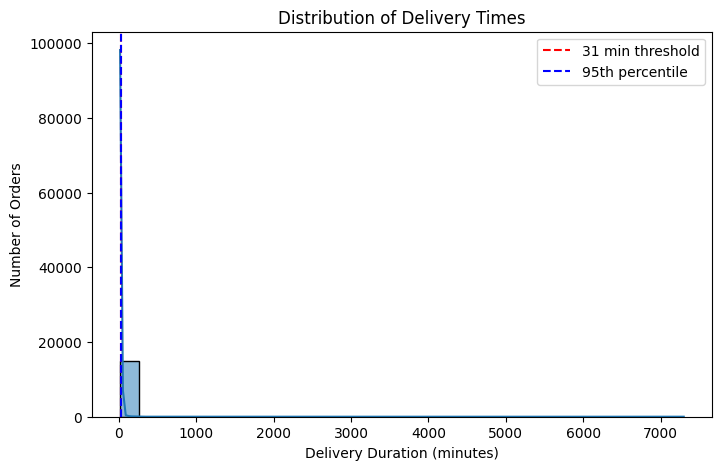

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_duration'], bins=30, kde=True)
plt.axvline(31, color='red', linestyle='--', label='31 min threshold')
plt.axvline(percentile_95, color='blue', linestyle='--', label='95th percentile')
plt.legend()
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Duration (minutes)")
plt.ylabel("Number of Orders")
plt.show()

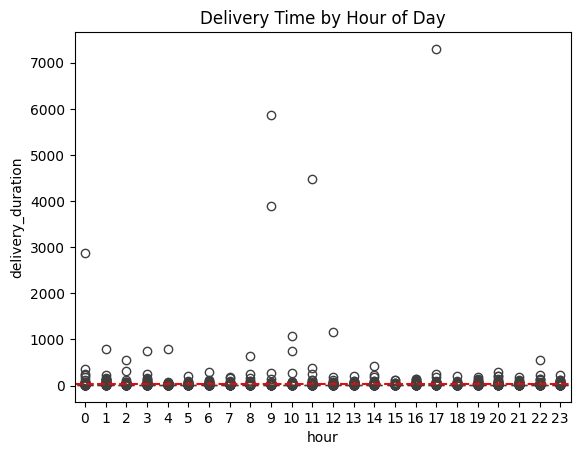

In [13]:
df['hour'] = df['order_time'].dt.hour
sns.boxplot(x='hour', y='delivery_duration', data=df)
plt.axhline(31, color='red', linestyle='--')
plt.title("Delivery Time by Hour of Day")
plt.show()

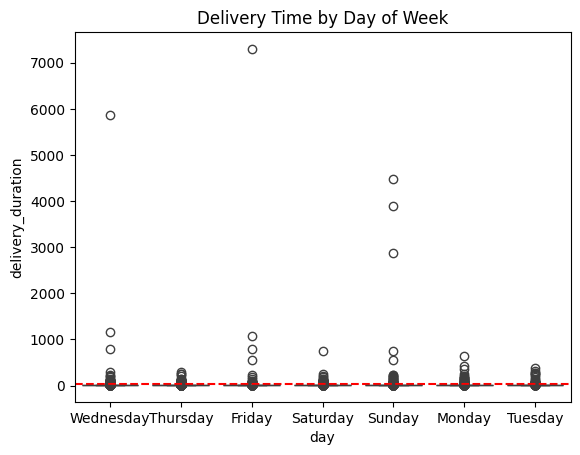

In [14]:
df['day'] = df['order_time'].dt.day_name()
sns.boxplot(x='day', y='delivery_duration', data=df)
plt.axhline(31, color='red', linestyle='--')
plt.title("Delivery Time by Day of Week")
plt.show()

In [15]:
late_orders = (df['delivery_duration'] > 31).mean() * 100
print("Percentage of Late Orders:", late_orders)

Percentage of Late Orders: 3.713333333333333
